Recognizing Shapes in Objects with OpenCV
=========================================


Import libraries.

In [24]:
import cv2
import numpy as np
import os

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image filenames.

In [26]:
files = (
    'subway.jpg',
    'breakfast.jpg',
    'dinner.jpg',
    'building.jpg',
)
f = os.path.join('/content/drive/MyDrive/Recognizing-Shapes-in-Images-with-OpenCV/images', files[0])

Define a function for viewing images.

In [27]:
def view_image(i):
  from google.colab.patches import cv2_imshow
  cv2_imshow(i)
  # cv2.imshow('view', i)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

Read an image from file.

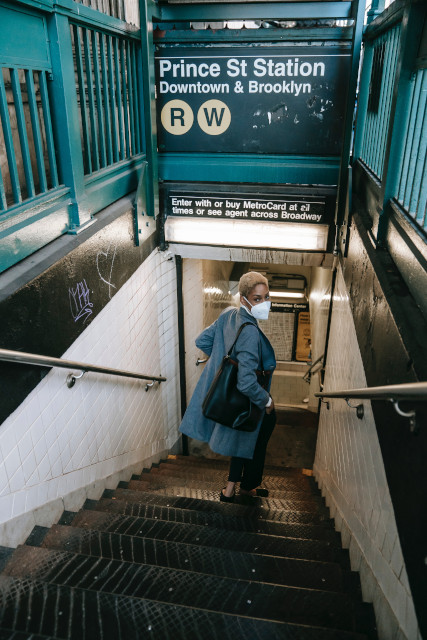

In [28]:
i = cv2.imread(f)
view_image(i)

Inspect image contents

In [29]:
print(i.shape)
print(i[0, 0, :])

(640, 427, 3)
[22 24  4]


Gray-scale

(640, 427)
18


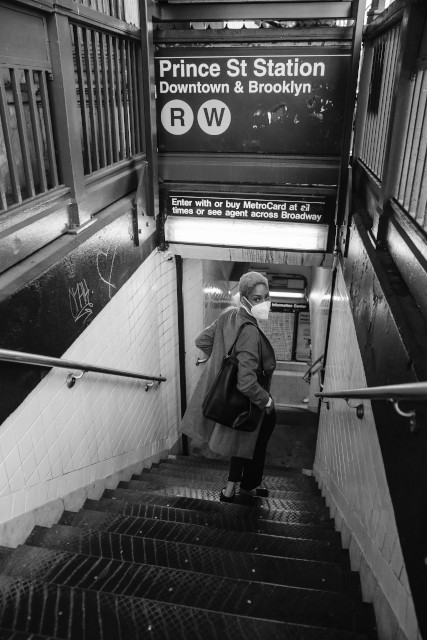

In [30]:
i_gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
print(i_gray.shape)
print(i_gray[0,0])
view_image(i_gray)

X gradient

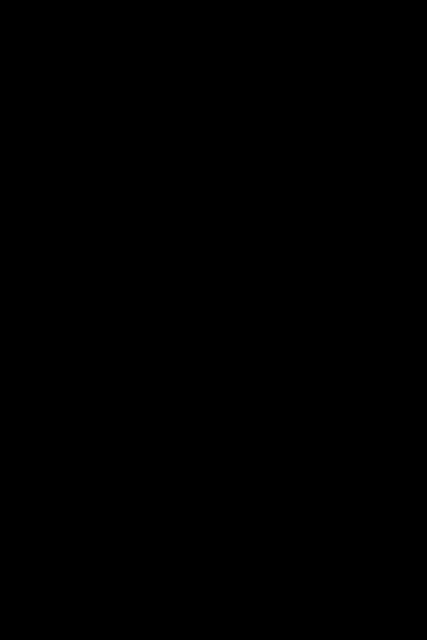

In [31]:
sobelx = cv2.Sobel(i_gray, cv2.CV_64F, 1, 0)
abs_sobelx = np.absolute(sobelx)
view_image(abs_sobelx / np.max(abs_sobelx))

Y gradient

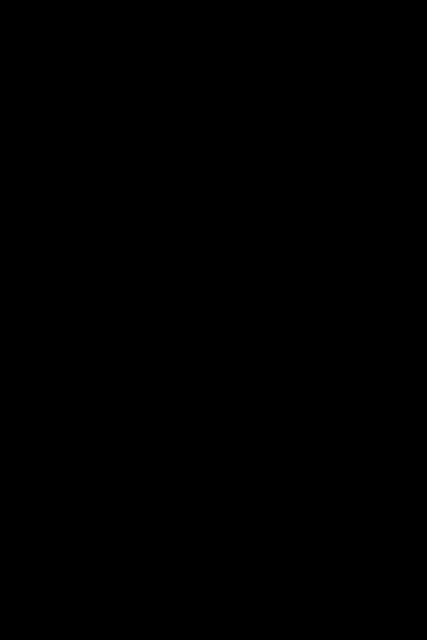

In [32]:
sobely = cv2.Sobel(i_gray, cv2.CV_64F, 0, 1)
abs_sobely = np.absolute(sobely)
view_image(abs_sobely / np.max(abs_sobely))

Magnitude of gradient vector

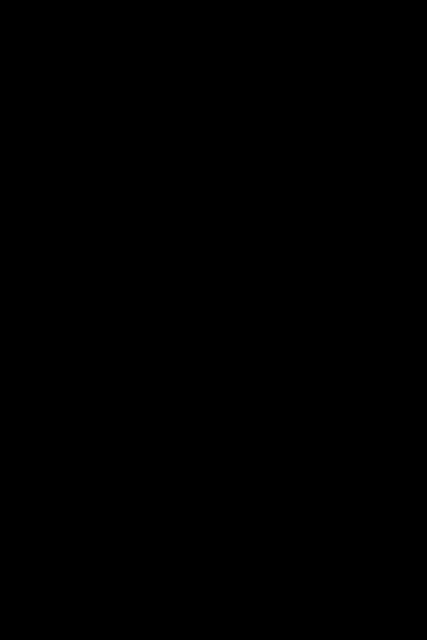

In [33]:
magnitude = np.sqrt(sobelx**2 + sobely**2)
view_image(magnitude / np.max(magnitude))

Canny edge detection

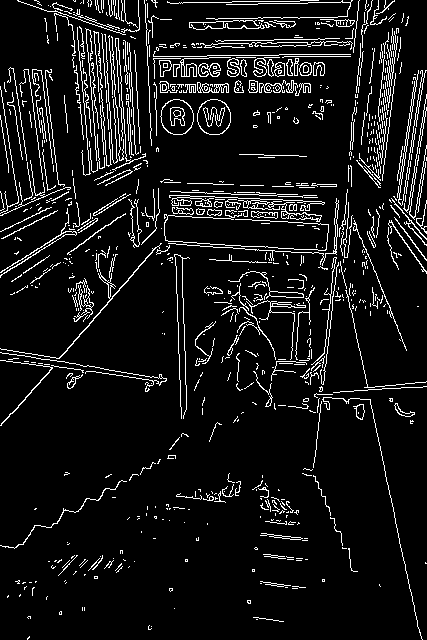

In [34]:
edges = cv2.Canny(i_gray, 200, 250)
view_image(edges)

Theory: Hough transforms

![title]('/content/drive/MyDrive/Recognizing-Shapes-in-Images-with-OpenCV/images2/line_diagram.png')

![title](/content/drive/MyDrive/Recognizing-Shapes-in-Images-with-OpenCV/images2/accumulator1.png)

![title](/content/drive/MyDrive/Recognizing-Shapes-in-Images-with-OpenCV/images2/edge_pixel.png)

![title](/content/drive/MyDrive/Recognizing-Shapes-in-Images-with-OpenCV/images2/accumulator2.png)

![title](/content/drive/MyDrive/Recognizing-Shapes-in-Images-with-OpenCV/images2/accumulator3.png)


Hough transform for lines

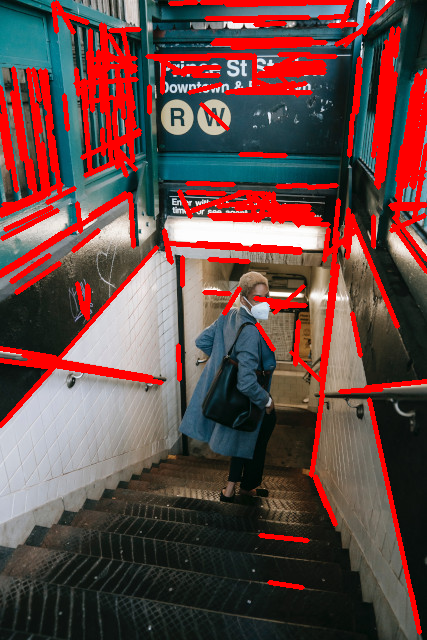

In [36]:
lines = cv2.HoughLinesP(
    edges, 
    rho = 1,
    theta = 1. * np.pi/180.0,
    threshold = 20,
    minLineLength = 25,
    maxLineGap = 5,
)
i_lines = i.copy()
for l in lines:
  x1,y1,x2,y2 = l[0]
  cv2.line(i_lines, (x1,y1), (x2,y2), (0,0,255), thickness = 3)
view_image(i_lines)

Hough transform for circles

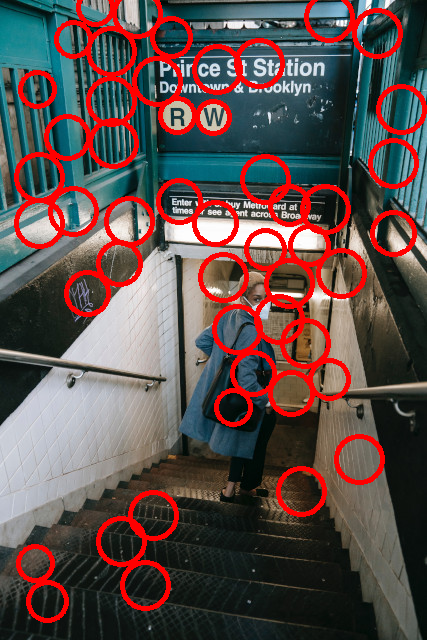

In [41]:
circles = cv2.HoughCircles(
    i_gray, 
    method = cv2.HOUGH_GRADIENT,
    dp = 2,
    minDist = 35,
    param1 = 150,
    param2 = 40,
    minRadius = 15,
    maxRadius = 25
)
i_circles = i.copy()
for x,y,r in circles[0]:
  cv2.circle(
      i_circles, 
      (int(x),int(y)),
      int(r),
      (0,0,255),
      thickness = 3
  )
view_image(i_circles)

Blur the image first

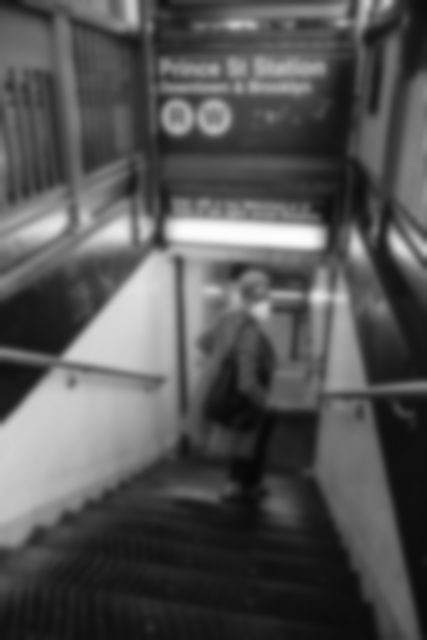

In [42]:
i_blurred = cv2.GaussianBlur(
    i_gray,
    ksize = (21,21),
    sigmaX = 0
)
view_image(i_blurred)

Circle detection on blurred image

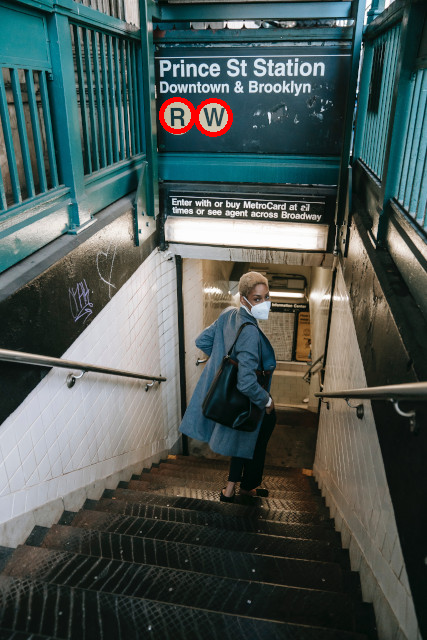

In [43]:
circles = cv2.HoughCircles(
    i_blurred, 
    method = cv2.HOUGH_GRADIENT,
    dp = 2,
    minDist = 35,
    param1 = 150,
    param2 = 40,
    minRadius = 15,
    maxRadius = 25
)
i_circles = i.copy()
for x,y,r in circles[0]:
  cv2.circle(
      i_circles, 
      (int(x),int(y)),
      int(r),
      (0,0,255),
      thickness = 3
  )
view_image(i_circles)